In [1]:
# processing
import operator
from operator import methodcaller
import csv
import re
import numpy as np
import pandas as pd
from pprint import pprint
import string
import math
import itertools

# gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import HdpModel
from gensim.models import TfidfModel
from gensim.models import word2vec

# plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

# sci-kit
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import feature_extraction
from sklearn.manifold import TSNE


C:\Users\pjz1\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
blacklist = [t.strip() for t in next(csv.reader(open("tools\\blacklist.csv", 'r')))]
levels = [0, 1, 2, 3]

# format [term, orig, sentence, docID]
inPath = "raw.csv"

inFile = open(inPath, 'r')
inReader = csv.reader(inFile)

docTokens = dict()

# ignore headers
next(inReader)


for inRow in inReader:
    term = inRow[0]
    sentence = inRow[2]
    docID = inRow[3]
    
    # find acceptable tokens only
    token = "_".join([t for t in term.split(":") if re.match(r'[^\W\d]*$', t) and not t in blacklist])
    
    # calculate new term level
    level = token.count("_")
    
    # if acceptable, add to dictionary
    if level in levels and not token in blacklist and len(token) > 0:
        if docID in docTokens:
            docTokens[docID] += [token]
        else:
            docTokens[docID] = [token]
                        
docIDs = list(docTokens.keys())
texts = list(docTokens.values())


In [4]:
dictionary = corpora.Dictionary(texts)
print(len(dictionary))

dictionary.filter_extremes(no_below=0, no_above=1, keep_n=15000)
print(len(dictionary))

corpus = [dictionary.doc2bow(text) for text in texts]


tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

5779
5779


In [5]:
topics = 10
passes = 2
iterations = 500

lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=topics, id2word=dictionary, passes=passes, workers =4)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic) + "\n")


Topic: 0 Word: 0.002*"nature" + 0.002*"enrichment" + 0.001*"email" + 0.001*"u_n_p" + 0.001*"STRIKE" + 0.001*"toshikazu" + 0.001*"banning" + 0.001*"gene" + 0.001*"pneumoniae" + 0.001*"fax"

Topic: 1 Word: 0.002*"cell" + 0.002*"variation" + 0.001*"production" + 0.001*"expression" + 0.001*"fuscacellulas" + 0.001*"rugulosum" + 0.001*"coli" + 0.001*"enzyme" + 0.001*"expression_vector" + 0.001*"protein"

Topic: 2 Word: 0.001*"development" + 0.001*"cell" + 0.001*"reye" + 0.001*"UK" + 0.001*"protein" + 0.001*"docking" + 0.001*"structure" + 0.001*"DIFFERENTIATE_COMMUNITY" + 0.001*"gene" + 0.001*"plate"

Topic: 3 Word: 0.002*"microcystin" + 0.001*"science" + 0.001*"mm" + 0.001*"pickettii" + 0.001*"green_fluorescent_protein" + 0.001*"braz" + 0.001*"protein" + 0.001*"surface_mutation" + 0.001*"mutation" + 0.001*"importance"

Topic: 4 Word: 0.003*"information" + 0.002*"reaction" + 0.002*"oligonucleotide" + 0.002*"fee" + 0.001*"effect" + 0.001*"probe" + 0.001*"institution" + 0.001*"field" + 0.001*"o

C:\Users\pjz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\Users\pjz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\Users\pjz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\Users\pjz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\Users\pjz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: D

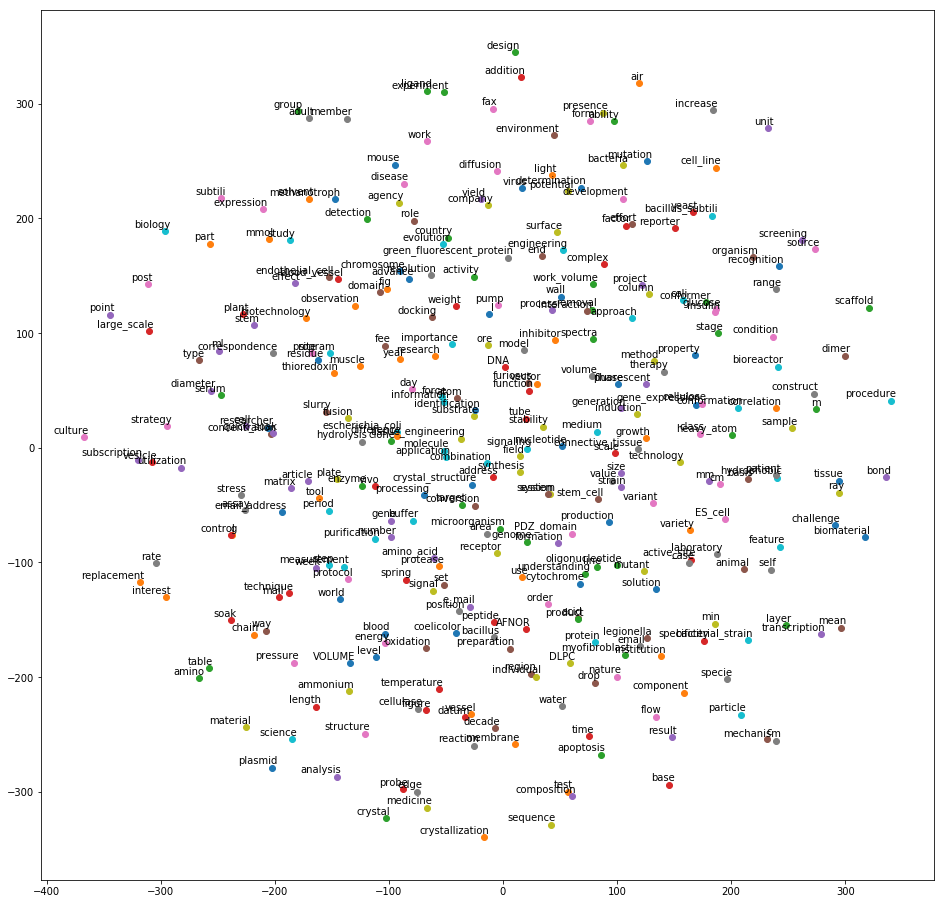

In [6]:
model = word2vec.Word2Vec(texts,size=10, window=20, min_count=5, workers=4)

labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

tsne_model = TSNE(perplexity=50, n_components=3, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()


In [8]:
model.most_similar('DNA')

C:\Users\pjz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('enzyme', 0.8921217918395996),
 ('role', 0.8509923219680786),
 ('signal', 0.7745742797851562),
 ('site', 0.7720765471458435),
 ('detection', 0.7697738409042358),
 ('muscle', 0.7408291101455688),
 ('number', 0.7163869738578796),
 ('cell_line', 0.6975338459014893),
 ('agency', 0.6955843567848206),
 ('year', 0.6926387548446655)]